In [15]:
import pandas as pd
import numpy as np

raw_data = pd.read_csv('archive/Absenteeism_data.csv');

raw_data.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [16]:
raw_data.shape

(700, 12)

In [17]:
df = raw_data.copy()

In [18]:
df.head()

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,11,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,36,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,3,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,11,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         700 non-null    int64  
 1   Reason for Absence         700 non-null    int64  
 2   Date                       700 non-null    object 
 3   Transportation Expense     700 non-null    int64  
 4   Distance to Work           700 non-null    int64  
 5   Age                        700 non-null    int64  
 6   Daily Work Load Average    700 non-null    float64
 7   Body Mass Index            700 non-null    int64  
 8   Education                  700 non-null    int64  
 9   Children                   700 non-null    int64  
 10  Pets                       700 non-null    int64  
 11  Absenteeism Time in Hours  700 non-null    int64  
dtypes: float64(1), int64(10), object(1)
memory usage: 65.8+ KB


There are not missing values

ID is not relevant, should be removed

Reason for absence and Date don't have the correct types

In [20]:
df = df.drop("ID", axis=1)

In [21]:
df.head()

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,26,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,0,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,23,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,7,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,23,23/07/2015,289,36,33,239.554,30,1,2,1,2


Check duplicates

In [22]:
df.duplicated().sum()

np.int64(8)

In [24]:
df[df.duplicated() == True]

,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
127,27,11/01/2016,118,10,37,308.593,28,1,0,0,2
128,27,12/01/2016,118,10,37,308.593,28,1,0,0,2
131,27,13/01/2016,118,10,37,308.593,28,1,0,0,2
305,23,19/10/2016,235,20,43,265.017,38,1,1,0,2
388,27,22/02/2017,179,51,38,251.818,31,1,0,0,3
389,27,24/02/2017,179,51,38,251.818,31,1,0,0,3
477,28,25/07/2017,246,25,41,230.290,23,1,0,0,2
496,28,05/09/2017,246,25,41,261.756,23,1,0,0,1


Checking if original df had the same duplicates

In [26]:
raw_data.duplicated().sum()

np.int64(8)

In [27]:
raw_data[raw_data.duplicated() == True]

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
127,34,27,11/01/2016,118,10,37,308.593,28,1,0,0,2
128,34,27,12/01/2016,118,10,37,308.593,28,1,0,0,2
131,34,27,13/01/2016,118,10,37,308.593,28,1,0,0,2
305,5,23,19/10/2016,235,20,43,265.017,38,1,1,0,2
388,3,27,22/02/2017,179,51,38,251.818,31,1,0,0,3
389,3,27,24/02/2017,179,51,38,251.818,31,1,0,0,3
477,24,28,25/07/2017,246,25,41,230.290,23,1,0,0,2
496,24,28,05/09/2017,246,25,41,261.756,23,1,0,0,1


In [28]:
raw_data[(raw_data.index == 126) | (raw_data.index == 127)]

,ID,Reason for Absence,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
126,34,27,15/01/2016,118,10,37,308.593,28,1,0,0,2
127,34,27,11/01/2016,118,10,37,308.593,28,1,0,0,2


They seem to represent the same employee being abscent for the same reason in different days

Now check reasons for abscence

In [29]:
df['Reason for Absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [30]:
df['Reason for Absence'].nunique()

28

In [31]:
df['Reason for Absence'].value_counts()

Reason for Absence
23    147
28    110
27     66
13     52
0      38
19     36
22     32
26     31
25     29
11     24
10     22
18     21
14     18
1      16
7      13
12      8
21      6
6       6
8       5
9       4
5       3
24      3
16      3
15      2
4       2
17      1
3       1
2       1
Name: count, dtype: int64

Converting them to dummy variables

In [32]:
reason_columns = pd.get_dummies(df['Reason for Absence'])

In [33]:
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [34]:
reason_columns['check'] = reason_columns.sum(axis=1)

In [35]:
reason_columns.head()

,0,1,2,3,4,5,6,7,8,9,...,19,21,22,23,24,25,26,27,28,check
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,1
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,1
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1
3,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,1
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,1


In [36]:
reason_columns['check'].unique()

array([1])

In [37]:
reason_columns = pd.get_dummies(df['Reason for Absence'], drop_first=True)

In [38]:
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


In [39]:
df = df.drop(['Reason for Absence'], axis=1)

In [40]:
reason_columns.head()

,1,2,3,4,5,6,7,8,9,10,...,18,19,21,22,23,24,25,26,27,28
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,False,False,False,False,False,False,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False


Group the values based on the reason of the abscense

In [41]:
reason_columns.loc[:, 1:14].max(axis=1).head()

0    False
1    False
2    False
3     True
4    False
dtype: bool

In [42]:
reason_type_1 = reason_columns.loc[:, 1:14].max(axis=1)
reason_type_2 = reason_columns.loc[:, 15:17].max(axis=1)
reason_type_3 = reason_columns.loc[:, 18:21].max(axis=1)
reason_type_4 = reason_columns.loc[:, 22:].max(axis=1)

Add the new features to the dataframe

In [43]:
df = pd.concat([df, reason_type_1, reason_type_2, reason_type_3, reason_type_4], axis=1)

In [44]:
df.head()

,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,0,1,2,3
0,07/07/2015,289,36,33,239.554,30,1,2,1,4,False,False,False,True
1,14/07/2015,118,13,50,239.554,31,1,1,0,0,False,False,False,False
2,15/07/2015,179,51,38,239.554,31,1,0,0,2,False,False,False,True
3,16/07/2015,279,5,39,239.554,24,1,2,0,4,True,False,False,False
4,23/07/2015,289,36,33,239.554,30,1,2,1,2,False,False,False,True


In [45]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 0, 1, 2, 3],
      dtype=object)

In [46]:
col_names = ['Date', 'Transportation Expense', 'Distance to Work', 'Age', 
             'Daily Work Load Average', 'Body Mass Index', 'Education', 
             'Children', 'Pets', 'Absenteeism Time in Hours', 
             'Reason_1', 'Reason_2', 'Reason_3', 'Reason _4']

In [47]:
df.columns = col_names

In [48]:
df.columns.values

array(['Date', 'Transportation Expense', 'Distance to Work', 'Age',
       'Daily Work Load Average', 'Body Mass Index', 'Education',
       'Children', 'Pets', 'Absenteeism Time in Hours', 'Reason_1',
       'Reason_2', 'Reason_3', 'Reason _4'], dtype=object)

In [49]:
col_names_ordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason _4', 'Date',
                    'Transportation Expense', 'Distance to Work', 'Age', 
                    'Daily Work Load Average', 'Body Mass Index', 
                    'Education', 'Children', 'Pets', 
                    'Absenteeism Time in Hours']

In [51]:
df = df[col_names_ordered]

In [52]:
df.head()

,Reason_1,Reason_2,Reason_3,Reason _4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,False,False,False,False,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,False,False,False,True,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,True,False,False,False,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,False,False,False,True,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [53]:
df_reason_mod = df.copy()

In [54]:
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason _4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,07/07/2015,289,36,33,239.554,30,1,2,1,4
1,False,False,False,False,14/07/2015,118,13,50,239.554,31,1,1,0,0
2,False,False,False,True,15/07/2015,179,51,38,239.554,31,1,0,0,2
3,True,False,False,False,16/07/2015,279,5,39,239.554,24,1,2,0,4
4,False,False,False,True,23/07/2015,289,36,33,239.554,30,1,2,1,2


In [55]:
type(df_reason_mod['Date'])

pandas.core.series.Series

In [56]:
type(df_reason_mod['Date'][0])

str

In [57]:
df_reason_mod['Date'] = pd.to_datetime(df_reason_mod['Date'], format='%d/%m/%Y')

In [58]:
type(df_reason_mod['Date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [59]:
df_reason_mod['Date'][0]

Timestamp('2015-07-07 00:00:00')

In [60]:
df_reason_mod['Date'][0].month

7

Create a list to store months in

In [61]:
list_months = []

In [62]:
for i in range(df_reason_mod.shape[0]):
    list_months.append(df_reason_mod['Date'][i].month)

In [63]:
df_reason_mod['month_value'] = list_months

In [64]:
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason _4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,month_value
0,False,False,False,True,2015-07-07,289,36,33,239.554,30,1,2,1,4,7
1,False,False,False,False,2015-07-14,118,13,50,239.554,31,1,1,0,0,7
2,False,False,False,True,2015-07-15,179,51,38,239.554,31,1,0,0,2,7
3,True,False,False,False,2015-07-16,279,5,39,239.554,24,1,2,0,4,7
4,False,False,False,True,2015-07-23,289,36,33,239.554,30,1,2,1,2,7


In [65]:
df_reason_mod['Date'][1]

Timestamp('2015-07-14 00:00:00')

In [66]:
df_reason_mod['Date'][1].weekday()

1

In [67]:
def date_to_weekday(date):
    return date.weekday()

In [68]:
df_reason_mod['day_of_week'] = df_reason_mod['Date'].apply(date_to_weekday)

In [69]:
df_reason_mod.head()

,Reason_1,Reason_2,Reason_3,Reason _4,Date,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,month_value,day_of_week
0,False,False,False,True,2015-07-07,289,36,33,239.554,30,1,2,1,4,7,1
1,False,False,False,False,2015-07-14,118,13,50,239.554,31,1,1,0,0,7,1
2,False,False,False,True,2015-07-15,179,51,38,239.554,31,1,0,0,2,7,2
3,True,False,False,False,2015-07-16,279,5,39,239.554,24,1,2,0,4,7,3
4,False,False,False,True,2015-07-23,289,36,33,239.554,30,1,2,1,2,7,3


Since we now have the month and day of week in their respective columns, we can drop 'Date'

In [70]:
df_reason_mod = df_reason_mod.drop(['Date'], axis=1)

Education

In [71]:
df_reason_mod['Education'].value_counts()

Education
1    583
3     73
2     40
4      4
Name: count, dtype: int64

In [72]:
df_reason_mod['Education'] = df_reason_mod['Education'].map({1:0, 2:1, 3:1, 4:1})

In [73]:
df_reason_mod['Education'].value_counts()

Education
0    583
1    117
Name: count, dtype: int64

In [74]:
df_processed = df_reason_mod.copy()
df_processed.head()

,Reason_1,Reason_2,Reason_3,Reason _4,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours,month_value,day_of_week
0,False,False,False,True,289,36,33,239.554,30,0,2,1,4,7,1
1,False,False,False,False,118,13,50,239.554,31,0,1,0,0,7,1
2,False,False,False,True,179,51,38,239.554,31,0,0,0,2,7,2
3,True,False,False,False,279,5,39,239.554,24,0,2,0,4,7,3
4,False,False,False,True,289,36,33,239.554,30,0,2,1,2,7,3


In [75]:
df_processed.to_csv('archive/processed_data.csv')

# MACHINE LEARNING PART

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [3]:
data_processed = pd.read_csv('archive/processed_data.csv')

col_names_ordered = ['Reason_1', 'Reason_2', 'Reason_3', 'Reason _4', 'month_value', 'day_of_week', 
                    'Transportation Expense', 'Distance to Work', 'Age', 
                    'Daily Work Load Average', 'Body Mass Index', 
                    'Education', 'Children', 'Pets', 
                    'Absenteeism Time in Hours']

data_processed = data_processed[col_names_ordered]

data_processed.head()

,Reason_1,Reason_2,Reason_3,Reason _4,month_value,day_of_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,7,1,289,36,33,239.554,30,0,2,1,4
1,False,False,False,False,7,1,118,13,50,239.554,31,0,1,0,0
2,False,False,False,True,7,2,179,51,38,239.554,31,0,0,0,2
3,True,False,False,False,7,3,279,5,39,239.554,24,0,2,0,4
4,False,False,False,True,7,3,289,36,33,239.554,30,0,2,1,2


In [4]:
unscaled_inputs = data_processed.iloc[:,:-1]

In [5]:
unscaled_inputs.head()

,Reason_1,Reason_2,Reason_3,Reason _4,month_value,day_of_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
0,False,False,False,True,7,1,289,36,33,239.554,30,0,2,1
1,False,False,False,False,7,1,118,13,50,239.554,31,0,1,0
2,False,False,False,True,7,2,179,51,38,239.554,31,0,0,0
3,True,False,False,False,7,3,279,5,39,239.554,24,0,2,0
4,False,False,False,True,7,3,289,36,33,239.554,30,0,2,1


In [7]:
correlation_matrix = unscaled_inputs.corr()
correlation_matrix

,Reason_1,Reason_2,Reason_3,Reason _4,month_value,day_of_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
Reason_1,1.000000,-0.053683,-0.181568,-0.702915,-0.002826,-0.078055,0.008725,-0.098625,0.022772,0.165434,-0.077597,0.095056,-0.061594,-0.054502
Reason_2,-0.053683,1.000000,-0.029241,-0.113203,-0.018406,-0.011194,-0.000487,-0.022372,0.030381,-0.016664,-0.078084,0.124487,0.081867,-0.041531
Reason_3,-0.181568,-0.029241,1.000000,-0.382881,-0.013796,-0.103661,0.016658,-0.023367,-0.019797,0.014542,-0.038087,0.046426,0.088256,0.105854
Reason _4,-0.702915,-0.113203,-0.382881,1.000000,-0.036989,0.110696,-0.066727,0.130687,-0.062765,-0.163826,0.071160,-0.108243,-0.049680,-0.013062
month_value,-0.002826,-0.018406,-0.013796,-0.036989,1.000000,0.071718,0.135803,-0.003970,0.004983,-0.174029,0.058254,-0.075561,0.082057,0.076250
day_of_week,-0.078055,-0.011194,-0.103661,0.110696,0.071718,1.000000,0.048516,0.089484,0.004039,0.012573,-0.071750,0.037951,0.111936,-0.045163
Transportation Expense,0.008725,-0.000487,0.016658,-0.066727,0.135803,0.048516,1.000000,0.234940,-0.223828,0.006123,-0.140531,-0.019623,0.381749,0.446887
Distance to Work,-0.098625,-0.022372,-0.023367,0.130687,-0.003970,0.089484,0.234940,1.000000,-0.131076,-0.073683,0.136190,-0.289994,0.048534,0.171585
Age,0.022772,0.030381,-0.019797,-0.062765,0.004983,0.004039,-0.223828,-0.131076,1.000000,-0.045452,0.483762,-0.219723,0.046930,-0.252067
Daily Work Load Average,0.165434,-0.016664,0.014542,-0.163826,-0.174029,0.012573,0.006123,-0.073683,-0.045452,1.000000,-0.098430,-0.058990,0.032194,0.010490


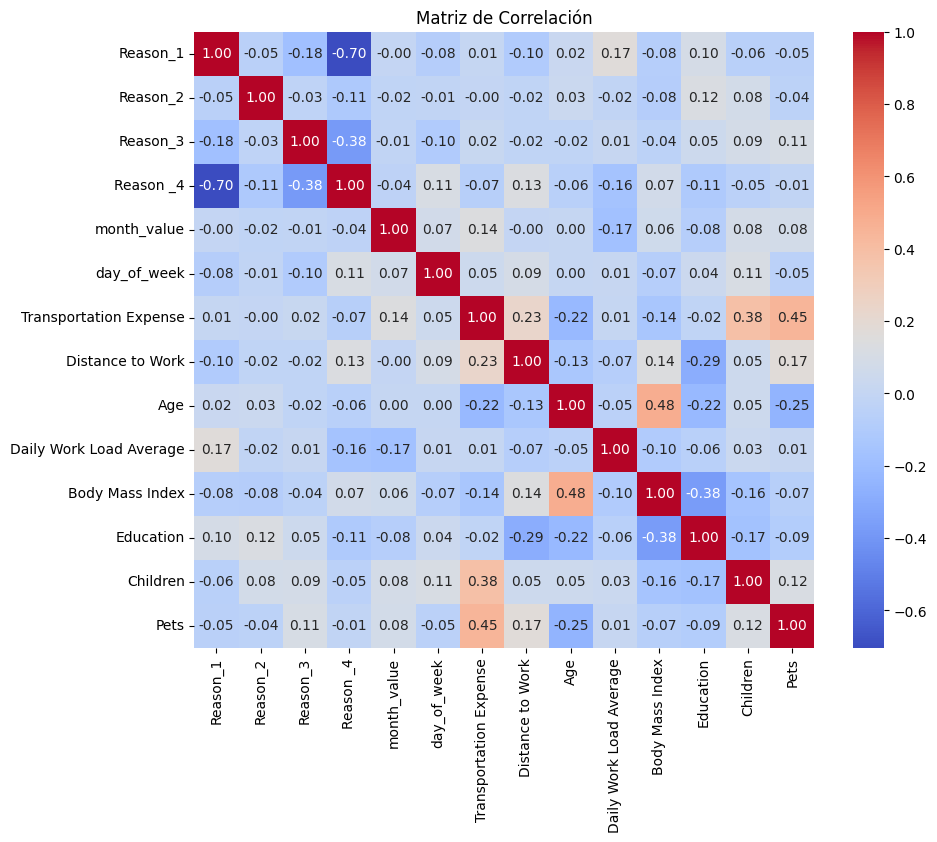

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Correlación")
plt.show()

In [9]:
targets = data_processed['Absenteeism Time in Hours']

In [10]:
targets.head()

0    4
1    0
2    2
3    4
4    2
Name: Absenteeism Time in Hours, dtype: int64

In [68]:
scaler = StandardScaler()

In [69]:
scaler.fit(unscaled_inputs)

StandardScaler()

In [70]:
scaled_inputs = scaler.transform(unscaled_inputs)

In [71]:
X_train, X_test, y_train, y_test = train_test_split(scaled_inputs, targets, test_size=0.2, random_state=42)

In [72]:
X_train.shape

(560, 14)

In [73]:
X_test.shape

(140, 14)

In [74]:
y_train.shape

(560,)

In [75]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)

In [76]:
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
#evaluate the mode on the training set
rf.score(X_train, y_train)

0.9517857142857142

## Manually check the accuracy

In [78]:
y_hat = rf.predict(X_train) 

In [79]:
correct = (y_hat == y_train).sum()
correct

np.int64(533)

In [80]:
correct / y_train.shape[0]

np.float64(0.9517857142857142)

### Now some predictions

In [81]:
data_processed[:1]

,Reason_1,Reason_2,Reason_3,Reason _4,month_value,day_of_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
0,False,False,False,True,7,1,289,36,33,239.554,30,0,2,1,4


In [82]:
row_to_predict = data_processed.iloc[0, :-1]
row_to_predict

Reason_1                     False
Reason_2                     False
Reason_3                     False
Reason _4                     True
month_value                      7
day_of_week                      1
Transportation Expense         289
Distance to Work                36
Age                             33
Daily Work Load Average    239.554
Body Mass Index                 30
Education                        0
Children                         2
Pets                             1
Name: 0, dtype: object

In [83]:
scaled_row = scaler.transform([row_to_predict.values])
scaled_row

/home/edwin/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.57735027, -0.09298136, -0.31448545,  0.82136542,  0.18272635,
        -0.68370352,  1.00584437,  0.41281584, -0.53606239, -0.80633129,
         0.76743118, -0.44798003,  0.88046927,  0.26848661]])

In [84]:
prediction = rf.predict(scaled_row)
prediction[0]

np.int64(4)

### Another prediction

In [85]:
data_processed[40:41]

,Reason_1,Reason_2,Reason_3,Reason _4,month_value,day_of_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets,Absenteeism Time in Hours
40,False,False,False,True,9,1,184,42,27,241.476,21,0,0,0,2


In [86]:
row_to_predict = data_processed.iloc[40:41, :-1]
row_to_predict

,Reason_1,Reason_2,Reason_3,Reason _4,month_value,day_of_week,Transportation Expense,Distance to Work,Age,Daily Work Load Average,Body Mass Index,Education,Children,Pets
40,False,False,False,True,9,1,184,42,27,241.476,21,0,0,0


In [87]:
scaled_row = scaler.transform(row_to_predict.values)
scaled_row

/home/edwin/.local/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-0.57735027, -0.09298136, -0.31448545,  0.82136542,  0.7537462 ,
        -0.68370352, -0.57868874,  0.81838929, -1.47730906, -0.75827313,
        -1.34938863, -0.44798003, -0.91902997, -0.58968976]])

In [88]:
prediction = rf.predict(scaled_row)
prediction[0]

np.int64(2)

### Nice, model seems to be making awesome predictions :D

# Now lets try with Neuronal Network

In [197]:
X = unscaled_inputs.values

In [198]:
Y = targets.values

In [199]:
X.shape

(700, 14)

In [200]:
Y.shape

(700,)

In [201]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [202]:
# Definición de la función StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

if Y_train.ndim == 1:
    Y_train = Y_train.reshape(-1, 1)
if Y_test.ndim == 1:
    Y_test = Y_test.reshape(-1, 1)

print(f"X_train shape: {X_train.shape}")
print(f"Y_train shape: {Y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"Y_test shape: {Y_test.shape}")

X_train shape: (560, 14)
Y_train shape: (560, 1)
X_test shape: (140, 14)
Y_test shape: (140, 1)


In [203]:
# Define dimensions
output_var = Y_train.shape[1]
dims = X_train.shape[1]
print(f'{output_var} output variables')
print(f'{dims} input variables')

1 output variables
14 input variables


In [204]:
# Importación librerías
from keras.models import Sequential
from keras.layers import Dense, Activation
from livelossplot import PlotLossesKeras
from keras import backend as K
import keras.optimizers as opts

In [205]:
# Model 1 - Single Layer
K.clear_session()
model1 = Sequential()
model1.add(Dense(output_var, input_shape=(dims,)))  # No activation for regression output
model1.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
print(model1.summary())

/home/edwin/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            15 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

None


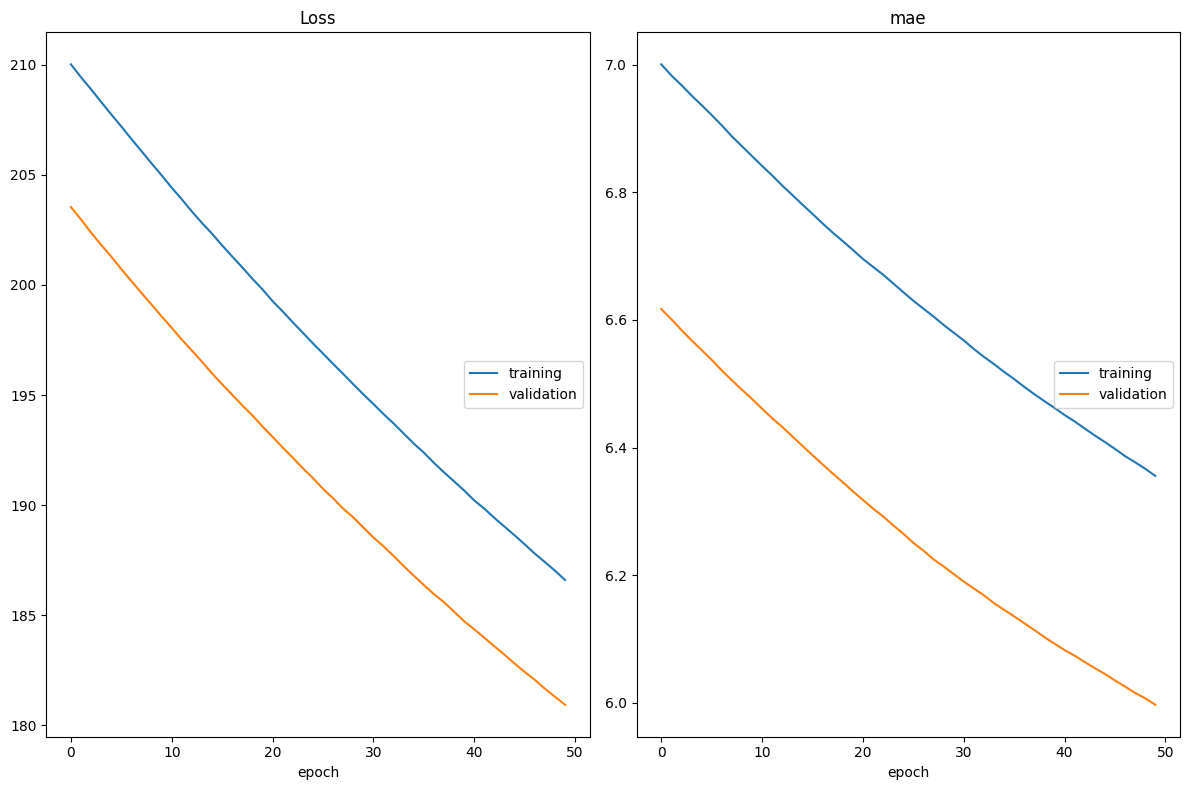

Loss
	training         	 (min:  186.607, max:  210.017, cur:  186.607)
	validation       	 (min:  180.941, max:  203.539, cur:  180.941)
mae
	training         	 (min:    6.356, max:    7.001, cur:    6.356)
	validation       	 (min:    5.997, max:    6.617, cur:    5.997)
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 145.0260 - mae: 6.0763 - val_loss: 180.9415 - val_mae: 5.9970


In [206]:
# Entrenamiento de la red neuronal con 50 épocas
model1.fit(X_train, Y_train, 
          verbose=1, 
          epochs=50, 
          validation_data=(X_test, Y_test),
          callbacks=[PlotLossesKeras()])

# Now with multiple layers

In [207]:
# Model 2 - Multi Layer
K.clear_session()
model2 = Sequential()
model2.add(Dense(256, input_shape=(dims,), activation='relu'))
model2.add(Dense(128, activation='relu'))  # Added intermediate layer
model2.add(Dense(64, activation='relu'))
model2.add(Dense(output_var))  # No activation for regression output
model2.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
print(model2.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,057 (176.00 KB)

 Trainable params: 45,057 (176.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [208]:
# Definición de función de perdida. Se usa mean_squared_error dado que es un ejercicio de regresión
from keras.optimizers import Adam
model2.compile(optimizer='adam', loss='mean_squared_error')

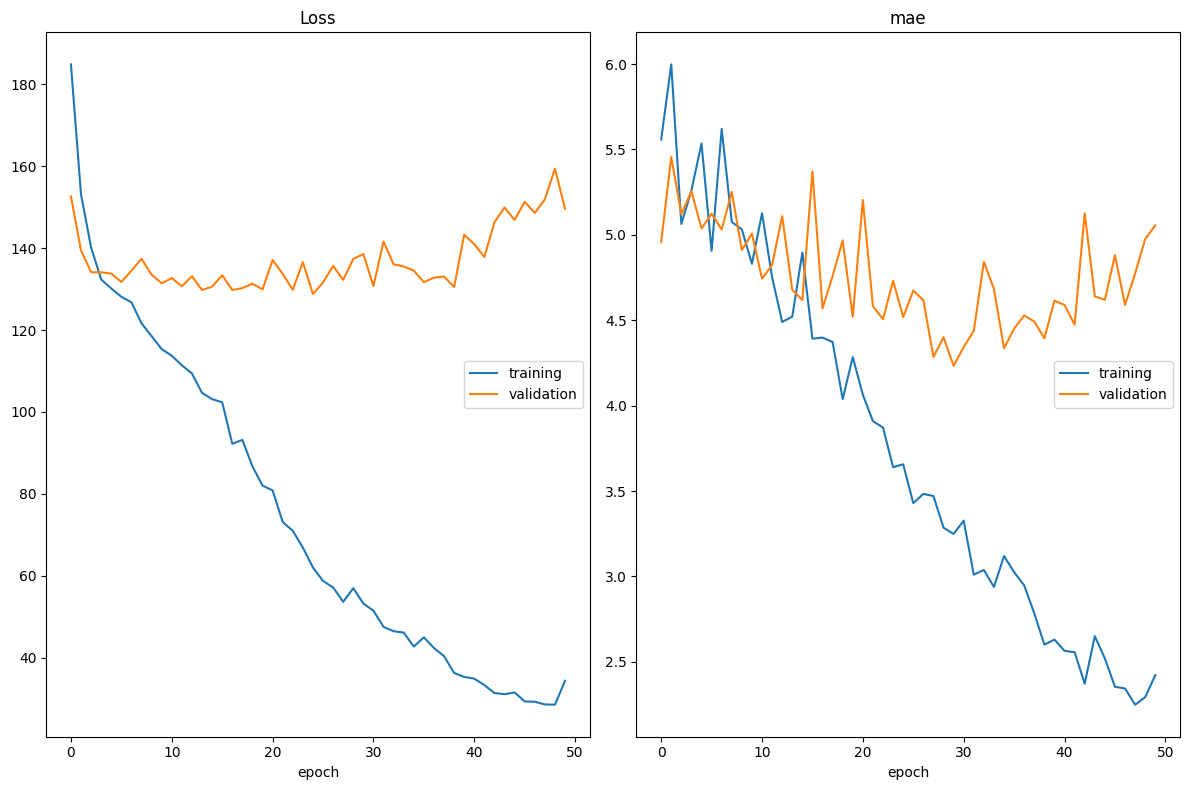

Loss
	training         	 (min:   28.469, max:  184.904, cur:   34.310)
	validation       	 (min:  128.807, max:  159.429, cur:  149.578)
mae
	training         	 (min:    2.249, max:    5.998, cur:    2.422)
	validation       	 (min:    4.233, max:    5.456, cur:    5.055)
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 32.5379 - mae: 2.5777 - val_loss: 149.5777 - val_mae: 5.0555


In [209]:
# Entrenamiento de la red neuronal con 50 épocas
model2.fit(X_train, Y_train,
          validation_data = (X_test, Y_test),
          epochs=50, 
          callbacks=[PlotLossesKeras()])

# Now with early stopping and dropout

In [210]:
# Model 3 - With Early Stopping and Dropout
from keras.layers import Dropout
K.clear_session()
model3 = Sequential()
model3.add(Dense(256, input_shape=(dims,), activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(128, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(output_var))  # No activation for regression output
model3.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])
print(model3.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │         3,840 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,057 (176.00 KB)

 Trainable params: 45,057 (176.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [211]:
# Importación librerías
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping, ModelCheckpoint

# Definición de la función EarlyStopping para considerar durante el entrenamiento
early_stop = EarlyStopping(monitor='val_loss', patience=2, verbose=1) 
# Definición de la función ModelCheckpoint para guardar el modelo con mejor desempeño
best_model = ModelCheckpoint('my_model.keras', verbose=0, save_best_only=True)

In [213]:
# Entrenamiento de la red neuronal con 50 épocas y early stopping
model3.fit(X_train, Y_train, 
          verbose=True, 
          epochs=50, 
          batch_size=128,
          validation_data=(X_test,Y_test),
          callbacks=[best_model, early_stop])

Epoch 1/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 182.1999 - mae: 6.2979 - val_loss: 182.1080 - val_mae: 5.2540
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - loss: 182.1999 - mae: 6.2979 - val_loss: 182.1080 - val_mae: 5.2540
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 232.2758 - mae: 6.0490 - val_loss: 168.7432 - val_mae: 4.6652
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 232.2758 - mae: 6.0490 - val_loss: 168.7432 - val_mae: 4.6652
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 160.7748 - mae: 4.7373 - val_loss: 157.5021 - val_mae: 4.9347
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - loss: 160.7748 - mae: 4.7373 - val_loss: 157.5021 - val_mae: 4.9347
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 169.1281 - mae: 5.3047 - val_loss: 153.6383 - val_mae: 5.7091
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 169.1281 - mae: 5.3047 - val_loss: 153.6383 - val_mae: 5.7091
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step

# Final - Comparativas

## Neuronal Networks

Model: 1 - Una capa 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
Mean Squared Error: 180.94151306152344
Mean Absolute Error (MAE): 5.996950149536133
Mean Absolute Percentage Error (MAPE): 32621792491.623943
R^2 Score: -0.15492725372314453

Model: 2 - Multicapa 
Mean Squared Error: 180.94151306152344
Mean Absolute Error (MAE): 5.996950149536133
Mean Absolute Percentage Error (MAPE): 32621792491.623943
R^2 Score: -0.15492725372314453

Model: 2 - Multicapa 
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
Mean Squared Error: 149.5777130126953
Mean Absolute Error (MAE): 5.055466175079346
Mean Absolute Percentage Error (MAPE): 37361085347.527954
R^2 Score: 0.04526400566101074

Model: 3 - Multicapa - Early Stopping + Model Checkpoint
Mean Squared Error: 149.5777130126953
Mean Absolute Error (MAE): 5.055466175079346
Mean Absolute Percentage Error (MAPE): 37361085347.527954
R^2 Score: 0.04526400566101074

Model: 3 - Multicapa - Early S

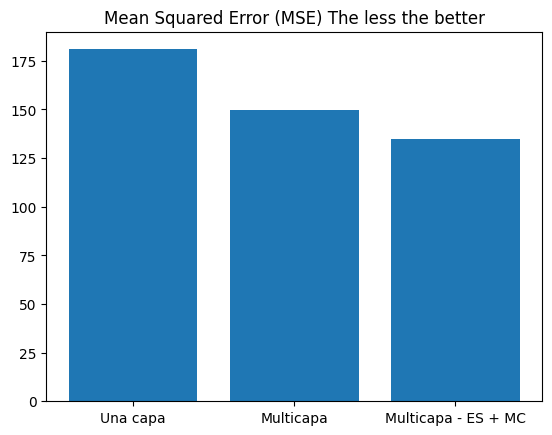

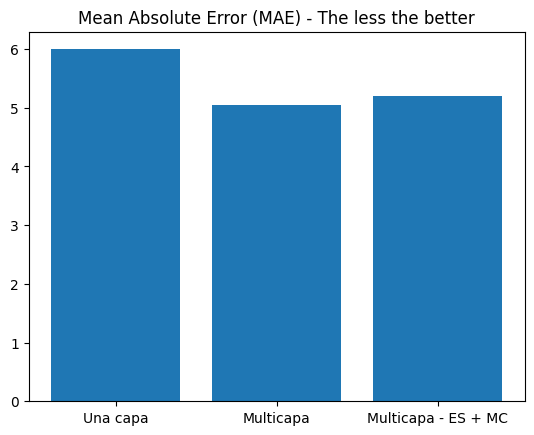

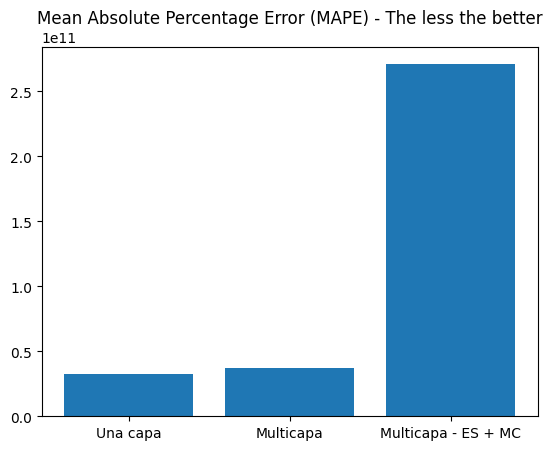

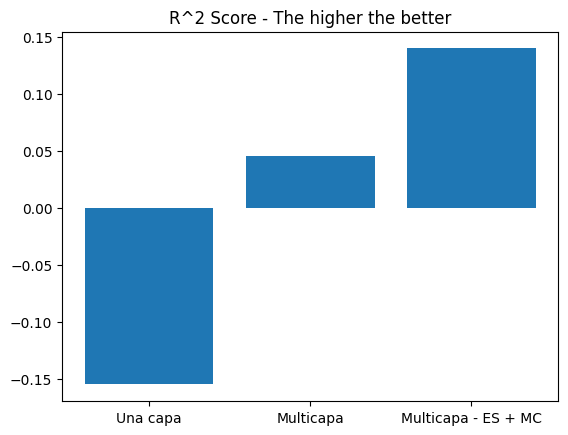

In [214]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

models = [model1, model2, model3]

statistics = []


for idx, model in enumerate(models):
    print(f"Model: {idx+1} - {'Una capa' if idx == 0 else 'Multicapa'} {'- Early Stopping + Model Checkpoint' if idx == 2 else ''}")
    Y_pred = model.predict(X_test)
    
    # Check for NaN values and handle them
    if np.isnan(Y_pred).any():
        print(f"Warning: Model {idx+1} predictions contain NaN values. Skipping this model.")
        statistics.append({
            "mse": float('inf'),
            "mae": float('inf'), 
            "mape": float('inf'),
            "score": -float('inf'),
        })
        continue
    
    # Calculate metrics
    mse = mean_squared_error(Y_test, Y_pred)
    mae = mean_absolute_error(Y_test, Y_pred)
    r2 = r2_score(Y_test, Y_pred)
    
    # Calculate MAPE with proper handling of zero values
    # Add small epsilon to avoid division by zero
    epsilon = 1e-10
    mape = np.mean(np.abs((Y_test - Y_pred) / (Y_test + epsilon))) * 100
    
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error (MAE):", mae)
    print("Mean Absolute Percentage Error (MAPE):", mape)
    print("R^2 Score:", r2)
    print()

    statistics.append({
        "mse": mse,
        "mae": mae,
        "mape": mape,
        "score": r2,
    })

MODEL1_NAME = "Una capa"
MODEL2_NAME = "Multicapa"
MODEL3_NAME = "Multicapa - ES + MC"

fig, ax = plt.subplots()
ax.set_title("Mean Squared Error (MSE) The less the better")
ax.bar(x = [MODEL1_NAME, MODEL2_NAME, MODEL3_NAME], height = [statistics[0]["mse"], statistics[1]["mse"], statistics[2]["mse"]])
plt.show()

fig, ax = plt.subplots()
ax.set_title("Mean Absolute Error (MAE) - The less the better")
ax.bar(x = [MODEL1_NAME, MODEL2_NAME, MODEL3_NAME], height = [statistics[0]["mae"], statistics[1]["mae"], statistics[2]["mae"]])
plt.show()

fig, ax = plt.subplots()
ax.set_title("Mean Absolute Percentage Error (MAPE) - The less the better")
ax.bar(x = [MODEL1_NAME, MODEL2_NAME, MODEL3_NAME], height = [statistics[0]["mape"], statistics[1]["mape"], statistics[2]["mape"]])
plt.show()

fig, ax = plt.subplots()
ax.set_title("R^2 Score - The higher the better")
ax.bar(x = [MODEL1_NAME, MODEL2_NAME, MODEL3_NAME], height = [statistics[0]["score"], statistics[1]["score"], statistics[2]["score"]])
plt.show()